In [16]:
import pandas as pd
import os
%matplotlib inline

# Pivot

In [17]:
scoring = pd.read_pickle(os.path.join(".","pickle_files", "scoring.pickle"))
team_splits = pd.read_pickle(os.path.join(".", "pickle_files", "team_splits.pickle"))

In [18]:
scoring.head()
# firstName lastName pos are annotation columns
# playerID year tmID are Identifier columns
# GP G A Pts SOG are varible columns

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [19]:
three_years = scoring[(scoring["year"] > 2000) & (scoring["year"] < 2004)]
three_years.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
9,Ramzi,Abid,L,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
10,Ramzi,Abid,L,abidra01,2002,PIT,3.0,0.0,0.0,0.0,7.0
11,Ramzi,Abid,L,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
39,Craig,Adams,R,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
40,Craig,Adams,R,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0


In [20]:
three_years = three_years.drop_duplicates(subset=["playerID", "year"])
three_years.head()
counts = three_years["playerID"].value_counts()
ids = counts[counts == 3].sample(3).index
print(ids)

Index(['gaborma01', 'arnasty01', 'holmsto01'], dtype='object')


In [21]:
df3 = three_years[three_years["playerID"].isin(ids)]
basic_df = df3[["playerID", "year", "G"]]
print("This is LONG dataframe")
basic_df

This is LONG dataframe


,playerID,year,G
488,arnasty01,2001,3.0
489,arnasty01,2002,19.0
490,arnasty01,2003,22.0
7952,gaborma01,2001,30.0
7953,gaborma01,2002,30.0
7954,gaborma01,2003,18.0
10497,holmsto01,2001,8.0
10498,holmsto01,2002,20.0
10499,holmsto01,2003,15.0


In [22]:
pivot = basic_df.pivot(index="playerID", columns="year", values="G")
print("This is wide dataframe")
pivot

This is wide dataframe


year,2001,2002,2003
playerID,,,
arnasty01,3.0,19.0,22.0
gaborma01,30.0,30.0,18.0
holmsto01,8.0,20.0,15.0


<b> Pivot -> Long to wide <br>
Melt -> wide to Long

You must have noticed the index and column headers in pivot dataframe. pivot() adds them. We can remove those as well.

In [23]:
print(pivot.index)
print(pivot.columns)
print(pivot.index.name)
print(pivot.columns.name)

Index(['arnasty01', 'gaborma01', 'holmsto01'], dtype='object', name='playerID')
Int64Index([2001, 2002, 2003], dtype='int64', name='year')
playerID
year


In [24]:
pivot.index.name = None
pivot.columns.name = None
print(pivot.index)
print(pivot.columns)
print(pivot.index.name)
print(pivot.columns.name)
pivot

Index(['arnasty01', 'gaborma01', 'holmsto01'], dtype='object')
Int64Index([2001, 2002, 2003], dtype='int64')
None
None


,2001,2002,2003
arnasty01,3.0,19.0,22.0
gaborma01,30.0,30.0,18.0
holmsto01,8.0,20.0,15.0


In [25]:
pivot.index.name = "playerID"
pivot.columns.name = "year"
print(pivot.index)
print(pivot.columns)
print(pivot.index.name)
print(pivot.columns.name)
pivot

Index(['arnasty01', 'gaborma01', 'holmsto01'], dtype='object', name='playerID')
Int64Index([2001, 2002, 2003], dtype='int64', name='year')
playerID
year


year,2001,2002,2003
playerID,,,
arnasty01,3.0,19.0,22.0
gaborma01,30.0,30.0,18.0
holmsto01,8.0,20.0,15.0


,year,G
playerID,,
arnasty01,2001,3.0
arnasty01,2002,19.0
arnasty01,2003,22.0
gaborma01,2001,30.0
gaborma01,2002,30.0


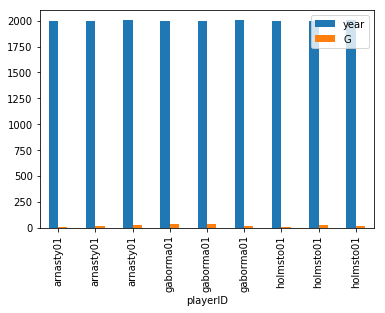

In [26]:
basic_df.set_index("playerID").plot.bar()
basic_df.set_index("playerID").head(5)

year,2001,2002,2003
playerID,,,
arnasty01,3.0,19.0,22.0
gaborma01,30.0,30.0,18.0
holmsto01,8.0,20.0,15.0


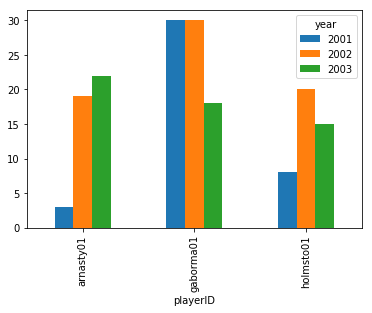

In [27]:
pivot.plot.bar()
pivot.head()

In the above graph, the x-axis has the index and y-axis has the column values

# Melt

melt() doesn't like the index so reset it

In [28]:
pivot = pivot.reset_index()
pivot.columns.name =None
pivot

,playerID,2001,2002,2003
0,arnasty01,3.0,19.0,22.0
1,gaborma01,30.0,30.0,18.0
2,holmsto01,8.0,20.0,15.0


In [31]:
pivot.melt()

,variable,value
0,playerID,arnasty01
1,playerID,gaborma01
2,playerID,holmsto01
3,2001,3
4,2001,30
5,2001,8
6,2002,19
7,2002,30
8,2002,20
9,2003,22


In [42]:
# id_vars contains the identifier column name
pivot.melt(id_vars="playerID") 
# varible column in output data frame will have all column names from input data frame and value column 
# will have respective value

,playerID,variable,value
0,arnasty01,2001,3.0
1,gaborma01,2001,30.0
2,holmsto01,2001,8.0
3,arnasty01,2002,19.0
4,gaborma01,2002,30.0
5,holmsto01,2002,20.0
6,arnasty01,2003,22.0
7,gaborma01,2003,18.0
8,holmsto01,2003,15.0


In [36]:
pivot.melt(id_vars="playerID", var_name="year", value_name="goals")

,playerID,year,goals
0,arnasty01,2001,3.0
1,gaborma01,2001,30.0
2,holmsto01,2001,8.0
3,arnasty01,2002,19.0
4,gaborma01,2002,30.0
5,holmsto01,2002,20.0
6,arnasty01,2003,22.0
7,gaborma01,2003,18.0
8,holmsto01,2003,15.0


In [40]:
# value_vars is used to filter the column from orignal dataframe
pivot.melt(id_vars="playerID", value_vars=[2001, 2002], var_name="year", value_name="goals")

,playerID,year,goals
0,arnasty01,2001,3.0
1,gaborma01,2001,30.0
2,holmsto01,2001,8.0
3,arnasty01,2002,19.0
4,gaborma01,2002,30.0
5,holmsto01,2002,20.0


In [43]:
larger_df3 = df3[["playerID", "tmID", "year", "G"]]
larger_df3

,playerID,tmID,year,G
488,arnasty01,CHI,2001,3.0
489,arnasty01,CHI,2002,19.0
490,arnasty01,CHI,2003,22.0
7952,gaborma01,MIN,2001,30.0
7953,gaborma01,MIN,2002,30.0
7954,gaborma01,MIN,2003,18.0
10497,holmsto01,DET,2001,8.0
10498,holmsto01,DET,2002,20.0
10499,holmsto01,DET,2003,15.0


In [45]:
try: 
    larger_df3.pivot(index=["playerID", "tmID"], columns="year", values="G")
except Exception as e:
    print(e)

Length of passed values is 9, index implies 2


In [47]:
larger_df3 = df3[["playerID", "year", "G", "A"]]
larger_df3

,playerID,year,G,A
488,arnasty01,2001,3.0,1.0
489,arnasty01,2002,19.0,20.0
490,arnasty01,2003,22.0,33.0
7952,gaborma01,2001,30.0,37.0
7953,gaborma01,2002,30.0,35.0
7954,gaborma01,2003,18.0,22.0
10497,holmsto01,2001,8.0,18.0
10498,holmsto01,2002,20.0,20.0
10499,holmsto01,2003,15.0,15.0


In [49]:
multi_index_test = larger_df3.pivot(index="playerID", columns="year", values=["G", "A"])
multi_index_test

G                 A            
year       2001  2002  2003  2001  2002  2003
playerID                                     
arnasty01   3.0  19.0  22.0   1.0  20.0  33.0
gaborma01  30.0  30.0  18.0  37.0  35.0  22.0
holmsto01   8.0  20.0  15.0  18.0  20.0  15.0

In [50]:
multi_index_test.index

Index(['arnasty01', 'gaborma01', 'holmsto01'], dtype='object', name='playerID')

In [51]:
multi_index_test.columns

MultiIndex(levels=[['G', 'A'], [2001, 2002, 2003]],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[None, 'year'])